In [65]:
import pandas as pd 
import cv2   
import numpy as np 
import os
import tensorflow as tf 
import matplotlib.pyplot as plt
import pathlib
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [66]:
train_path="../input/self2/archive (1)/New Masks Dataset/Train"
train_data=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224),
                         classes=['Mask', 'Non Mask'], batch_size=32, shuffle= True)

val_path="../input/self2/archive (1)/New Masks Dataset/Validation"
val_data=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224),
                         classes=['Mask', 'Non Mask'], batch_size=32, shuffle = True)

test_path="../input/self2/archive (1)/New Masks Dataset/Test"
test_data=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224),
                         classes=['Mask', 'Non Mask'], batch_size=32, shuffle = False)

Found 1630 images belonging to 2 classes.
Found 244 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [67]:
train_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [68]:
test_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [69]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [70]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 256)      

In [72]:
model.fit(
  train_data,
  validation_data=val_data,
  epochs=15
)

Epoch 1/15
51/51 [==============================] - 22s 428ms/step - loss: 10.6165 - accuracy: 0.6796 - val_loss: 0.3780 - val_accuracy: 0.8730
Epoch 2/15
51/51 [==============================] - 23s 446ms/step - loss: 0.2570 - accuracy: 0.9001 - val_loss: 0.2549 - val_accuracy: 0.9016
Epoch 3/15
51/51 [==============================] - 22s 427ms/step - loss: 0.2323 - accuracy: 0.9270 - val_loss: 0.1899 - val_accuracy: 0.9426
Epoch 4/15
51/51 [==============================] - 22s 440ms/step - loss: 0.2065 - accuracy: 0.9185 - val_loss: 0.1869 - val_accuracy: 0.9262
Epoch 5/15
51/51 [==============================] - 21s 416ms/step - loss: 0.1540 - accuracy: 0.9487 - val_loss: 0.1843 - val_accuracy: 0.9426
Epoch 6/15
51/51 [==============================] - 21s 418ms/step - loss: 0.1178 - accuracy: 0.9613 - val_loss: 0.4138 - val_accuracy: 0.8893
Epoch 7/15
51/51 [==============================] - 22s 436ms/step - loss: 0.1808 - accuracy: 0.9410 - val_loss: 0.1622 - val_accuracy: 0.950

In [73]:
model.evaluate(test_data)

4/4 [==============================] - 1s 259ms/step - loss: 0.0521 - accuracy: 0.9800


[0.05208831652998924, 0.9800000190734863]

In [74]:
predictions = model.predict(x=test_data, steps=len(test_data))

In [75]:
#print(predictions)

In [76]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  0]
 [ 2 48]]


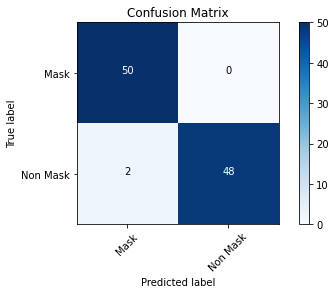

In [77]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=test_data.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Mask','Non Mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

[[9.998505e-01 1.494473e-04]]
With Mask


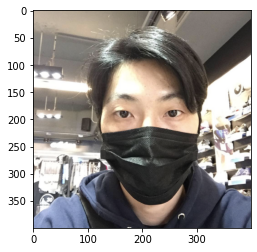

In [78]:
path='../input/face-mask-detection/dataset/with_mask/image_120.png'
im=mpimg.imread(path)
plt.imshow(im)
img = image.load_img(path,target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img)
prediction = model.predict(img_preprocessed)
print (prediction)
if prediction[0][1] < 0.5:
    print("With Mask")

else:
    print("Without Mask")